In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Note
### This entire thing can also be done using the skimage.segmentation.slic() method

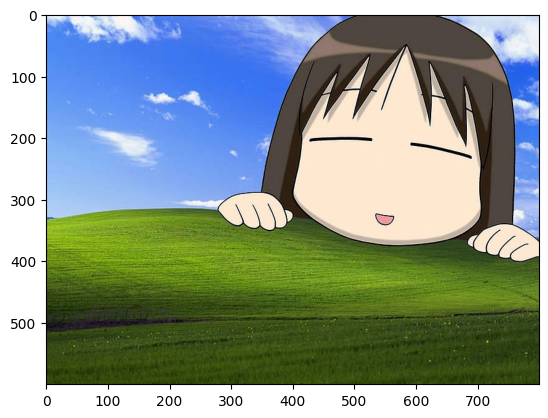

In [ ]:
img=plt.imread("pic2.jpg") # loading the image
plt.imshow(img)

In [100]:
imgres=img.shape
imgres # image resolution (the 3 values are rgb channels)

(600, 800, 3)

In [101]:
img=img.reshape((-1,3)) # falttening the image (i'm not sure that's the right word ?) to a 1D array with rgb channels

In [102]:
img.shape

(480000, 3)

# Segmentation

## Trying 3 Clusters

In [103]:
km=KMeans(n_clusters=3)
km.fit(img)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [104]:
labels=km.labels_ 

In [ ]:
set(labels) # printing the set to show unique labels only

{0, 1, 2}

In [106]:
centers=np.array(km.cluster_centers_,dtype='uint8')
centers

array([[238, 226, 213],
       [ 74,  91,  31],
       [103, 149, 240]], dtype=uint8)

In [107]:
segmented_values=centers[labels]
segmented_img=segmented_values.reshape((imgres))

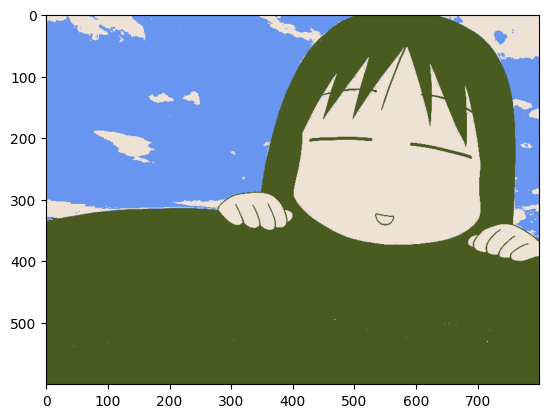

In [108]:
plt.imshow(segmented_img)

# Comparing clustering from 1 to 10 clusters

In [109]:
imgs=[]
for i in range(1,10):
    kmIMG=KMeans(n_clusters=i)
    kmIMG.fit(img)
    labels=kmIMG.labels_
    centers=np.array(kmIMG.cluster_centers_,dtype='uint8')
    segmented_values=centers[labels]
    segmented_img=segmented_values.reshape((imgres))
    imgs.append(segmented_img)
imgs=np.array(imgs)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

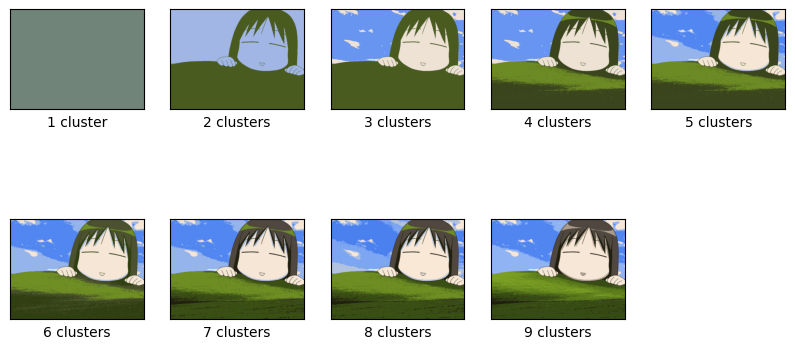

In [110]:
plt.figure(figsize=(10,5))
for i in range(1, len(imgs) + 1):
    plt.subplot(2, 5, i)
    plt.imshow(imgs[i - 1])
    if i==1:
        plt.xlabel(str(i) + " cluster")    
    else:
        plt.xlabel(str(i) + " clusters")
    plt.yticks([])
    plt.xticks([])

# Evaluation

## Getting the Inertia for clusters from 1 to 10

In [111]:
km.inertia_

1071050490.1071043

In [112]:
inertia_values=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,n_init='auto')
    km.fit_predict(img)
    inertia_values.append(km.inertia_)
inertia_values

[8932570494.905872,
 2402161187.4590626,
 1071051465.745362,
 896908954.4051673,
 585019692.1682863,
 379287469.1068737,
 322088934.0023417,
 277719521.0949421,
 233676544.8920038,
 189179049.06110018]

([<matplotlib.axis.XTick at 0x2438a692b10>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

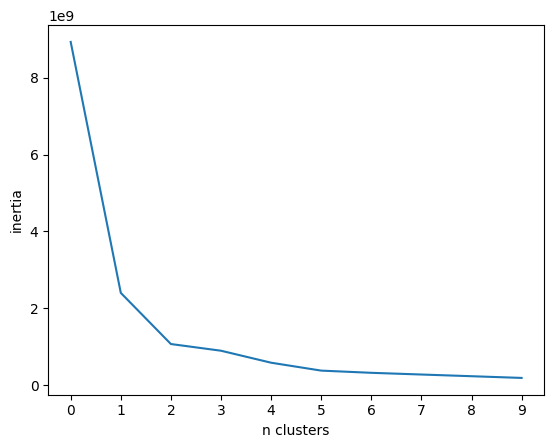

In [113]:
plt.plot(inertia_values)
plt.xlabel("n clusters")
plt.ylabel("inertia")
plt.xticks([i for i in range(0,10)])

## This part takes alot of time (i interrupted it at 70 mins because i'm not waiting any longer whataver) to execute so ignore it if you want

In [ ]:
"""silhouette_values=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,n_init='auto')
    km.fit_predict(img)
    silhouette_values.append(silhouette_score(img,km.fit_predict(img)))
silhouette_values"""

In [ ]:
"""plt.plot(silhouette_values)
plt.xlabel("n clusters")
plt.ylabel("silhouette score")
plt.xticks([i for i in range(0,10)])"""